# About the data

The dataset has following columns
* age
* sex
* cp: chest pain type
* trtbps: resting blood pressure
* chol: cholesterol
* fbs: fasting blood sugar 
* restecg: resting electrocardiographic results
* thalachh: maximum heart rate achieved
* exng: exercise induced angina
* oldpeak: previous peak
* slp: slope
* caa: number of major vessels
* thall: thal rate
* output: target/labels 0 or 1

# Problem Statement:

Your task for this homework will be to perform exploratory data analysis and predict if a person is prone to a heart attack (0 or 1). 















##  Answer the following:
* Is this a classification or regression task and why?



### 
I think this problem is a logistic regression. The first reason is because we are using exploratory data-- meaning that we are trying to make sense of the observation to then use on something else. The reason this is not linear regression is because since the outcome variable is a dummy variable, then we use logistic for the purpose of classifying/predicting is the person is prone to a heart attack given certain variables. 


# Step 1

* Begin by importing the data and displaying the first 5 observations.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns



In [2]:
data = pd.read_csv('data.csv')
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Answer the following using pandas

* How many observations are there in total?
* Are there any missing values?
* How many unique values are in each column?
* Which columns will you treat as categorical,which will you take as continuous, and why?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
columns = ['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall','output']

for i in columns:
    print(f'{i}: \t', data[i].nunique())


age: 	 41
sex: 	 2
cp: 	 4
trtbps: 	 49
chol: 	 152
fbs: 	 2
restecg: 	 3
thalachh: 	 91
exng: 	 2
oldpeak: 	 40
slp: 	 3
caa: 	 5
thall: 	 4
output: 	 2


there are 303 observations/entries. 

There are no missing values, at least from pandas looking at the column and reading 0s.

there are:  
41 unique values for age
2 unique values for sex
4 unique values for cp 
49 unique values for trtbps 
152 unique values for chol 
2 unique values for fbs 
3 unique values for restecg
91 unique values for thalachh
2 unique values for exng
40 unique values for oldpeak
3 unique values for slp
5 unique values for caa
4 unique values for thall
2 unique values for output


the columns i will take as categorical : sex, cpm fbs, restecg, exng, slp, caa, thall and output

the columns i will take as continuous : age, trtbps, chol, thalachh, oldpeak 


# Step 2
* Create a plot of your target variable on the x-axis and counts on the y-axis.

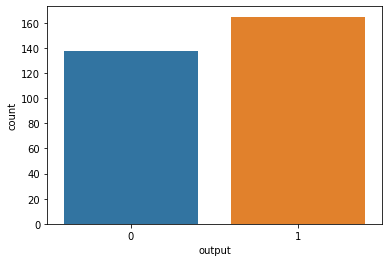

1    165
0    138
Name: output, dtype: int64

In [5]:
#Write your code here

sns.countplot(x=data['output'])
plt.show()
data['output'].value_counts()


## Answer the following
* Is the dataset balanced? In other words, is there an equal representation of people prone to heart attacks and those who are not.
* Is working with a balanced dataset important? Why or why not?

* How can we deal with an imbalanced dataset?

### Write your answer here

<!--The data set is not balanced, there are  more people who are prone to heart attacks-->

<!-- working with a balanced dataset is important because we need enough observations to make strong inferences about situations and if we dont have enough observations then we cant make assumptions as we usually would because the distribution cant be normalized -->


<!-- what we can deal with an imbalanced dataset is to use k-fold cross-validation and resample the training set  -->

# Step 3
* Create a count plot for each of your categorical variables. That is, the variable on the x-axis and
counts on the y-axis. Here’s an example of sex and slp:

<AxesSubplot:xlabel='output', ylabel='count'>

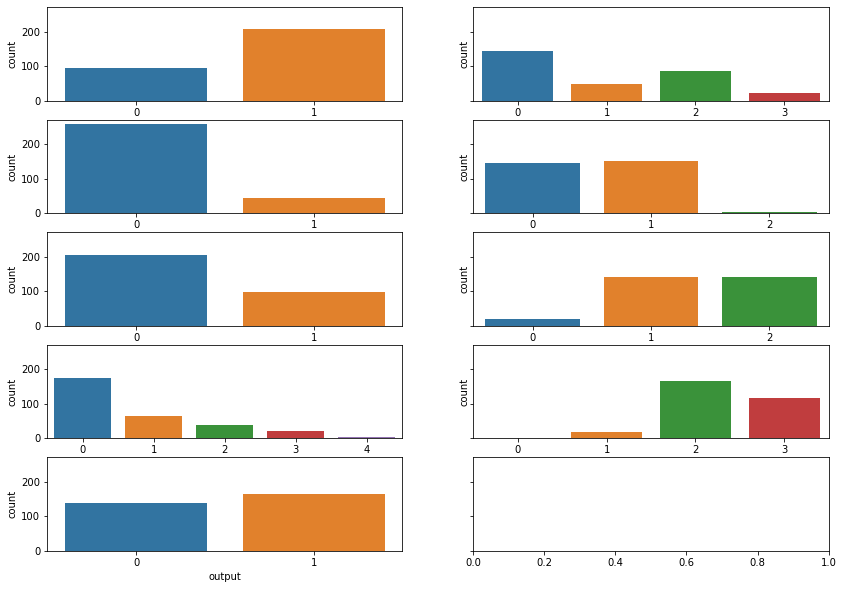

In [6]:
#Write your code here
fig, axes = plt.subplots(nrows=5, ncols=2, sharey=True, figsize=(14, 10))

cats = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

sns.countplot(x = data['sex'], ax = axes[0][0])
sns.countplot(x = data['cp'], ax = axes[0][1])
sns.countplot(x = data['fbs'], ax = axes[1][0])
sns.countplot(x = data['restecg'], ax = axes[1][1])
sns.countplot(x = data['exng'], ax = axes[2][0])
sns.countplot(x = data['slp'], ax = axes[2][1])
sns.countplot(x = data['caa'], ax = axes[3][0])
sns.countplot(x = data['thall'], ax = axes[3][1])
sns.countplot(x = data['output'], ax = axes[4][0])

## Answer the following
* What can you conclude from the plots you created? Are there any interesting findings?


<!-- theres a disbalance with all the variables. Output, relative to the other variables are a little bit more balanced -->


### Write your answer here

# Step 4
* Create box plots by outcome for each of your continuous variables. Here’s an example of age
and chol:

In [7]:
data.info()
nums =['age', 'trtbps', 'chol', 'thalachh','oldpeak']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


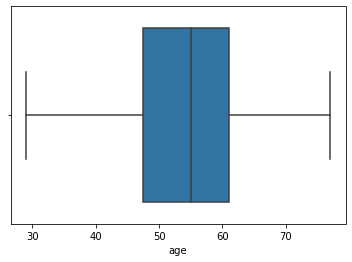

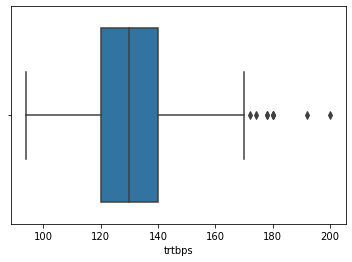

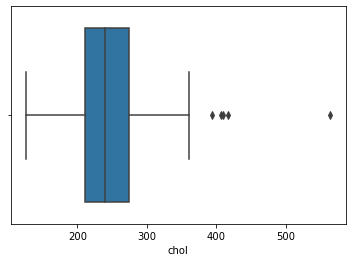

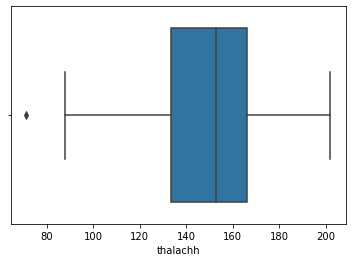

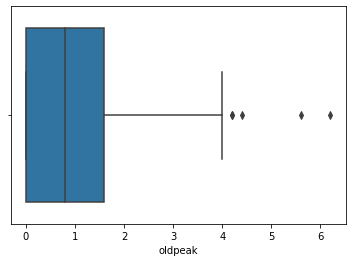

In [8]:
#Write your code here
sns.boxplot(x= 'age' ,data=data)
plt.show()
sns.boxplot(x= 'trtbps' ,data=data)
plt.show()
sns.boxplot(x= 'chol' ,data=data)
plt.show()
sns.boxplot(x= 'thalachh' ,data=data)
plt.show()
sns.boxplot(x= 'oldpeak' ,data=data)
plt.show()


## Answer the following:
* What can you conclude from the plots you created? Are there any interesting findings?



old peak has skewed values in the data set, given that their median and mean are very pushed to the left, its right skewed, theres also some outliers we see trailing off to the right, chol and trtbps also seem sligghtly skewed.

# Step 5

* Create distribution plots by outcome for each of your continuous variables. Here’s an example
of trtbps and cp:

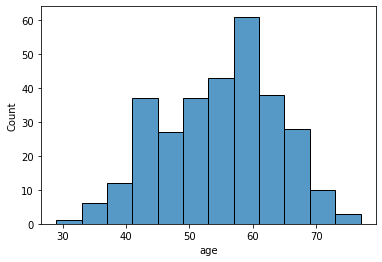

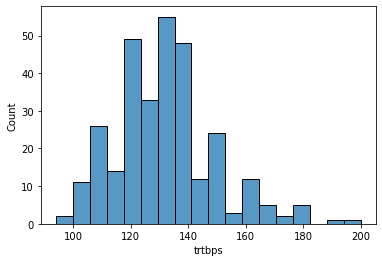

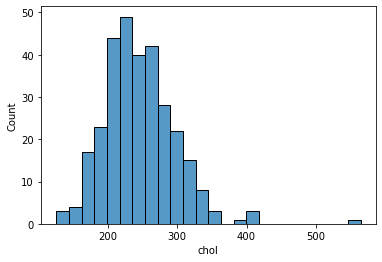

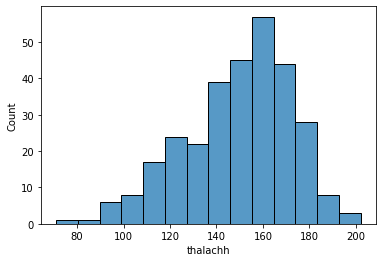

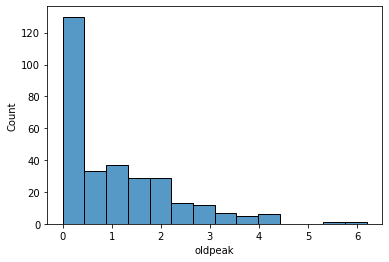

In [9]:
# Write your code here

for i in nums:
    sns.histplot(x=data[i].dropna())
    plt.show()

## Answer the following:
* What can you conclude from the plots you created? Are there any interesting findings?

### Write your answer here

again, age has a normal distribution, but oldpeak is highly skewed-- and trtbps is a little inconsistent. thalachh is also left skewed. chol is right skewed.

# Step 6
* Create a heatmap of your data. Here’s an example:

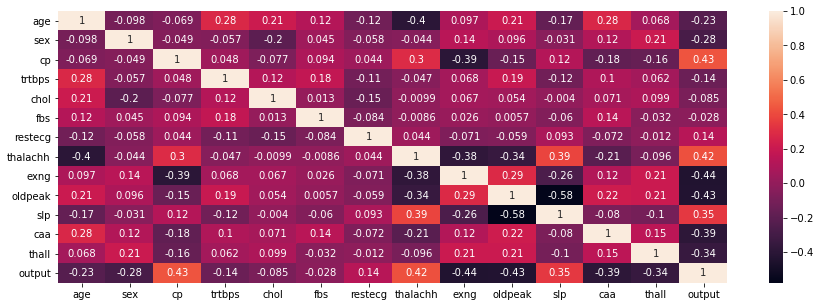

In [10]:
# Write your code here
from matplotlib import rcParams
rcParams['figure.figsize']=15,5

sns.heatmap(data.corr(), annot=True)
plt.show()

## Answer the following:
* What can you conclude from the heatmap you created? Are there any interesting
findings? 

### Write you

output and the following attributes are positively correlated: thalachh, sfp, cp. 
output and the follow are inversely correlated: oldpeak, caa, thall, exng, sex and age. 

I think the correlation of sex and age on output is interesting because thats something that we cannot control, that inversely impacts the outcome within this set of observations

# Step 7
* Explore the data a bit on your own and include a few additional graphs of your choice. For
example, here’s a line plot of cp vs. age:


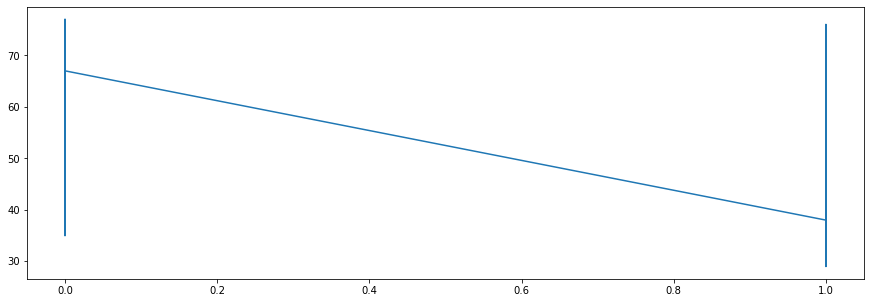

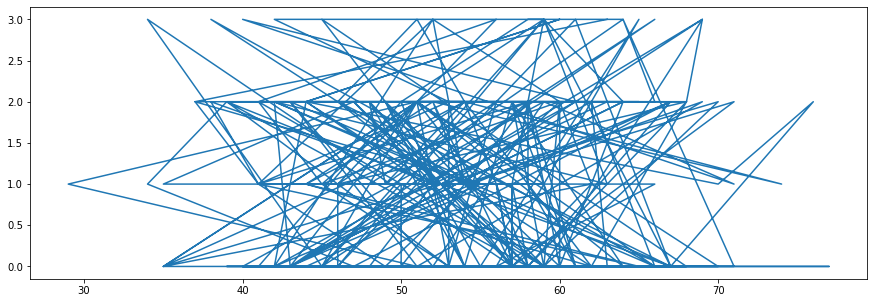

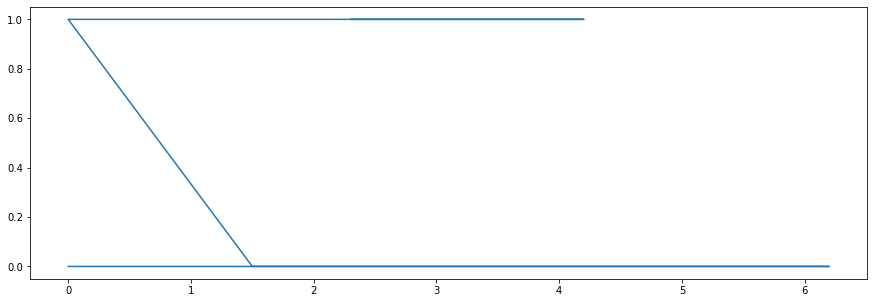

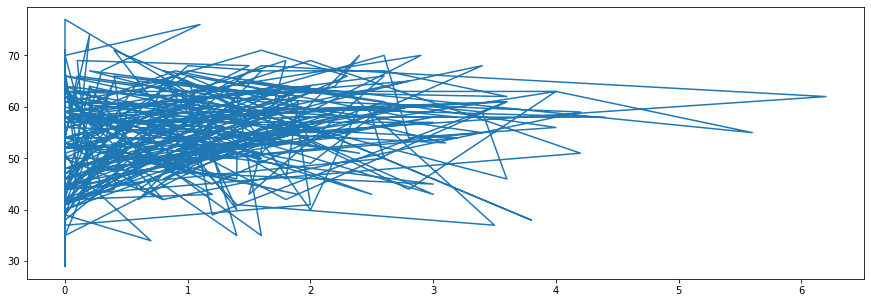

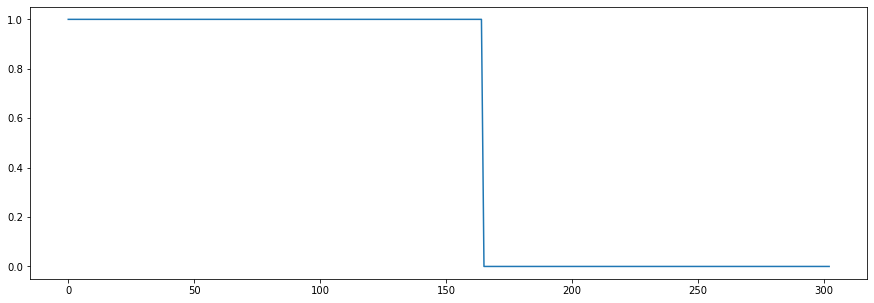

In [11]:
#write your code here

plt.plot(data['output'], data['age'])
plt.show()

plt.plot(data['age'], data['cp'])
plt.show()

plt.plot(data['oldpeak'], data['output'])
plt.show()

plt.plot(data['oldpeak'], data['age'])
plt.show()

plt.plot(data['output'])
plt.show()

## Answer the following:
* What can you conclude from the plots that you created? Did you find anything
interesting?


### Write your answer here


None of these plots make any visual sense-- im curious on the shapes they make..

although output and oldpeak, and output and age can be easily used in a logistic regression.

# Step 8

# Answer the following:
* Name two different models that you can use to solve the problem statement.
* What is the difference between label encoding and one hot encoding, and when should you use one over the other?
* What is multicollinearity, and why do we care about it when creating models? How can we check to see if there’s significant multicollinearity in our data?
* Why is scaling data important?
* For the two different models that you named earlier, are they using a parametric or non- parametric learning algorithms? What’s the difference?
* Suppose that we had missing values in our dataset. What are different ways we could handle them?

### Write your answer here

<!-- definitely logistic regresssion is a model because im seeing that output is a 1 or 0, we can also use decision trees to solve this with entropy critetrion since we have information and can generate like a workflow to decide whether 1 or 0 output -->


one hot encoding creates dummy variables out of one variable, so if the label is sex 1- female, 0-male, then one hot generates female_sex, male_sex represented by if the person is a female or male-- its essentially an expanded version, 

label encoding is used on categorical variables so that each numerical value represents either a category or a label. 

Personally, i would not opt to use onehot encoding often just because theres no need to make more columsn out of one, this can create problems with dimensionality if the dataset already has a lot of attributes --- keep a 1-female and 0-male in a sex column is more than fine. Label encoding is almost always a go-to for myself because then, the categorical variables have a numerical meaning and significance and then can be used as a quantitative variable rather than a qualitative feature


multicollinearity is when two or more variables can explain for each other. This is important to detect because we want to make sure we are not 'double-counting' the effects of one variable on another. For example, if we are regressing

Y= exam Score, and our X's = hours studied, extra curriculars, hours tutoring same subject

then we know that there is  acorrelation between hours studied and tutoring same subject because both of those have an effect on the students exam score and we can be introducing bias/over predicting exam score. 
We can use PCA to check for significant multicollinearity because PCA looks for points that have correlation to then try to reduce dimensionality in our data points. 


Scaling data is imperative because the magnitude of some variable's (just simply numerical effect) impact on our outcome variable can really shift our results-- so this makes sure that we have the same units and measurements all throughout our dataset

logistic regression is a parametric because its a rule-based/supervised learning, there are steps we simplify the function into a known form. On the other hand, decision tree is a non-parametric algorrithm because, like the name states- the splits on each attribute are decided by the computer's algorithm-- theres not a hard set rule in how attributes a split in the tree. 


# Step 9
* Choose 2 different models to solve the problem statement. Apply any necessary encoding,
scaling, and train test splits to your data and construct the 2 models you selected. Provide
a classification report and confusion matrix for both models.

In [29]:
#Write your code here

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

data.describe()

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.189210,0.466011,0.344017,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,0.333333,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
##need to restruct cp, fbs, restecg, 

data = data.drop(columns = ['chol', 'fbs','restecg', 'trtbps'])
data.head()



,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,150,0,2.3,0,0,1,1
1,37,1,2,187,0,3.5,0,0,2,1
2,41,0,1,172,0,1.4,2,0,2,1
3,56,1,1,178,0,0.8,2,0,2,1
4,57,0,0,163,1,0.6,2,0,2,1


In [14]:
data.isnull().sum()
data.describe()

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
scaler = MinMaxScaler()
data['age'] = scaler.fit_transform(data[['age']])
data['cp'] = scaler.fit_transform(data[['cp']])
data['thalachh'] = scaler.fit_transform(data[['thalachh']])
data['oldpeak'] = scaler.fit_transform(data[['oldpeak']])
data['slp'] = scaler.fit_transform(data[['slp']])
data['caa'] = scaler.fit_transform(data[['caa']])
data['thall'] = scaler.fit_transform(data[['thall']])
##,'cp','thalachh','oldpeak','slp','caa','thall']])



In [16]:
data.describe()

,age,sex,cp,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.189210,0.466011,0.344017,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,0.333333,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
X, y = data.iloc[:, :-1], data.iloc[:, -1:]       ##separating the data from the last column,
X.shape, y.shape

((303, 9), (303, 1))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 109) ##x,y,test_size, rs
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 9), (76, 9), (227, 1), (76, 1))

In [21]:
logmodel= LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [45]:
pred_log = logmodel.predict(X_test)

In [46]:
print(classification_report(y_test,pred_log))


              precision    recall  f1-score   support

           0       0.87      0.79      0.83        33
           1       0.85      0.91      0.88        43

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [47]:
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [48]:
pred_entropy = clf_entropy.predict(X_test)
print(classification_report(y_test,pred_entropy))


              precision    recall  f1-score   support

           0       0.71      0.76      0.74        33
           1       0.80      0.77      0.79        43

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.77      0.76      0.76        76



## Do the following:
* Write a conclusion (~1 paragraph) detailing the main points you discovered while
exploring the data. Also include things like: Did you scale your data? If so, which scaling
method did you use and why? Is there a specific reason you selected these 2 models? How did the 2 models compare against each other?

For this data- i used MinMaxScaler because since i began to work on logistic regression, then it would make sense to scale all the data within the range of 0 and 1. That way it also was already scaled for the Classifier Tree where we would classify output from 0 or 1.

Also, these two models, logistic regression and decision tree classifier was because i wanted to compare a supervised/non-supervised (or non-parametric vs parametric models) on the same data. 

I also dropped variables that didnt have much weight shown in the correlation matrix, so anything between a .3 and -.3 were dropped.

So the accuracy and f1 score on the logistic regression actually proved to be higher than on the classifiying tree. This shows that not always unsupervised learning is going to yield the best results-- i think logistic regression really triumphed and proved its importance in this setting. I believe that the decision tree classifier might need some more data to train and test out to see if there was an improvement.